FFR 120  
Felix Waldschock

HW 2  
Exercise 7.4

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science','grid'])
from tqdm import trange


In [2]:
# parameters
alpha = 0.5
sigma0 = 1
dSigma = 1.8 
L = 100
dT = 0.1
x0 = 0


In [3]:
def getSpuriousDrift(x, dt):
    return alpha * dSigma / L

In [4]:
def getSigma(x):
    return sigma0 + dSigma*x/L

In [5]:
def update(x):
    # x comes as an array of size N
    sigma = getSigma(x)
    o = sigma + np.sqrt(dT)
    directions = np.random.choice([-1, 1], N)
    o = o * directions  
    x = x + sigma * getSpuriousDrift(x) + o

In [6]:
# 1. Simulation with alpha = 0.5
alpha = 0.5                                 # spurious drift coefficient
N = 10000                                   # number of trajectiories (particles)
T_tot = [10, 100, 1000, 10000, 100000]      # total time

T_tot = np.array(T_tot)
Iteration_Steps = T_tot * (1 / dT)          # total number of steps 

max_steps = int(np.max(Iteration_Steps))


In [7]:
def simulate_trajectory(N, max_steps, L, alpha):
    x = np.ones(N)*x0
    trajectories = np.zeros((N, len(T_tot)))    # array to store trajectories  
    sigmas_ = np.zeros(N)                       # array to store sigmas
        
    for s in trange(max_steps):
        
        # get new noise
        sigma = np.zeros(N)
        # multiplicative noise
        tmp1 = sigma0 + dSigma*x/L
        tmp2 = dSigma * dT / L
        tmp3 = tmp1 * np.sqrt(dT)
        direction = np.random.choice([-1,1], N)
        sigma = alpha * tmp1 * tmp2 + tmp3 * direction
        
        x += sigma

        # check boundaries and apply correction
        x = np.where(x < -L/2, -L - x, x)
        x = np.where(x > L/2, L - x, x)
  
        if s in Iteration_Steps:
            index = np.where(Iteration_Steps == s)[0][0]
            trajectories[:, index] = x



    trajectories[:, -1] = x
    sigmas_ = sigma

    return trajectories, sigmas_


In [8]:
# Run 1st simulation
alpha = 0.5
if(1):
    trajectories, sigmas_ = simulate_trajectory(N, max_steps, L, alpha)

if (1):
    # save trajectories
    np.save('Simulated_Data/trajectories_74_0-5.npy', trajectories)
    np.save('Simulated_Data/sigmas_74_0-5.npy', sigmas_)

100%|████████████████████| 1000000/1000000 [01:51<00:00, 8951.81it/s]


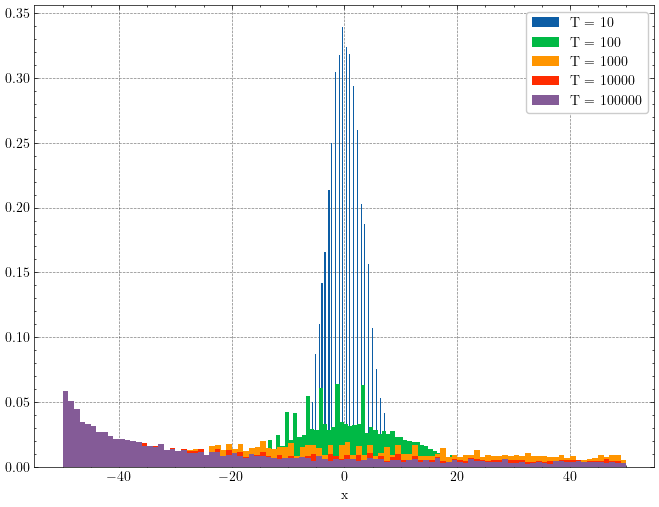

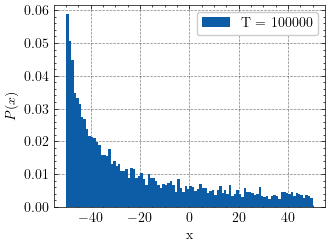

In [9]:
# load the trajectories from a file
trajectories = np.load('Simulated_Data/trajectories_74_0-5.npy')
sigmas_ = np.load('Simulated_Data/sigmas_74_0-5.npy')
bins = 100
alpha_plot = 1

# plot the trajectories in one histogram
fig, ax = plt.subplots(figsize=(8, 6))
plt.hist(trajectories[:, 0], bins=bins, density=True, label='T = 10', alpha=alpha_plot)
plt.hist(trajectories[:, 1], bins=bins, density=True, label='T = 100', alpha=alpha_plot)
plt.hist(trajectories[:, 2], bins=bins, density=True, label='T = 1000', alpha=alpha_plot)
plt.hist(trajectories[:, 3], bins=bins, density=True, label='T = 10000', alpha=alpha_plot)
plt.hist(trajectories[:, 4], bins=bins, density=True, label='T = 100000', alpha=alpha_plot)
plt.xlabel('x')
plt.legend()
#ax.set_yticklabels([])
plt.show()

# plot the last distribution
plt.hist(trajectories[:, -1], bins=bins, density=True, label='T = 100000', alpha=alpha_plot)
plt.xlabel('x')
plt.ylabel('$P(x)$')
plt.legend()
plt.show()

In [10]:
# print the means of the trajectories
print('mean of the trajectories:')
for i in range(len(T_tot)):
    print('T = {}: {}'.format(T_tot[i], np.mean(trajectories[:, i])))

mean of the trajectories:
T = 10: 0.1019934893376822
T = 100: 0.9782835453772308
T = 1000: 1.4292938637776407
T = 10000: -17.206339696447976
T = 100000: -21.745366606294667


7.4 -> $\alpha = 1$

In [11]:
# 1. Simulation with alpha = 1
alpha = 1                                 # spurious drift coefficient
N = 10000                                   # number of trajectories (particles)
T_tot = [10, 100, 1000, 10000]              # total time
T_tot = [10, 100, 1000, 10000, 100000]      # total time
T_tot = np.array(T_tot)
Iteration_Steps = T_tot * (1 / dT)          # total number of steps 

max_steps = int(np.max(Iteration_Steps))

# Store the time series trajectory in a tensor
trajectoryTensor = np.zeros((N, max_steps))


In [12]:
# Run simulation
if(1):
    trajectories, sigmas_ = simulate_trajectory(N, max_steps, L,alpha)

# save the trajectories to a file
if (1):
    # save trajectories
    np.save('Simulated_Data/trajectories_74_1.npy', trajectories)
    np.save('Simulated_Data/sigmas_74_1.npy', sigmas_)

100%|████████████████████| 1000000/1000000 [02:15<00:00, 7361.58it/s]


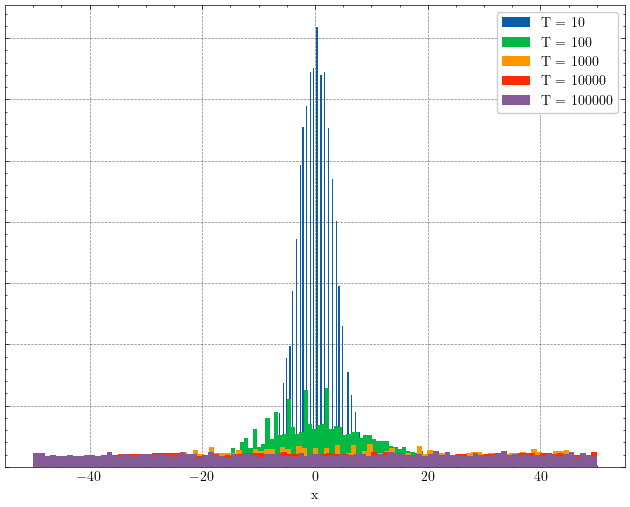

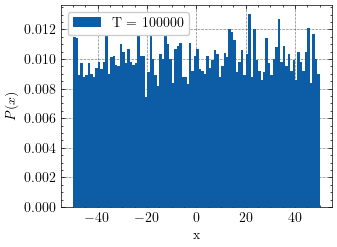

In [13]:
# load the trajectories from a file
trajectories = np.load('Simulated_Data/trajectories_74_1.npy')
sigmas_ = np.load('Simulated_Data/sigmas_74_1.npy')
bins = 100
alpha_plot = 1

# plot the trajectories in one histogram
fig, ax = plt.subplots(figsize=(8, 6))
plt.hist(trajectories[:, 0], bins=bins, density=True, label='T = 10', alpha=alpha_plot)
plt.hist(trajectories[:, 1], bins=bins, density=True, label='T = 100', alpha=alpha_plot)
plt.hist(trajectories[:, 2], bins=bins, density=True, label='T = 1000', alpha=alpha_plot)
plt.hist(trajectories[:, 3], bins=bins, density=True, label='T = 10000', alpha=alpha_plot)
plt.hist(trajectories[:, 4], bins=bins, density=True, label='T = 100000', alpha=alpha_plot)
plt.xlabel('x')
plt.legend()
ax.set_yticklabels([])
plt.show()

# plot the last distribution
plt.hist(trajectories[:, -1], bins=bins, density=True, label='T = 100000', alpha=alpha_plot)
plt.xlabel('x')
plt.ylabel('$P(x)$')
plt.legend()
plt.show()

In [14]:
# print the means of the trajectories
print('mean of the trajectories:')
for i in range(len(T_tot)):
    print('T = {}: {}'.format(T_tot[i], np.mean(trajectories[:, i])))

mean of the trajectories:
T = 10: 0.2022130629781826
T = 100: 2.0223230907126495
T = 1000: 7.798780769171707
T = 10000: 0.9845377812302307
T = 100000: 0.28156438095848807
